In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("S05-hw-dataset.csv")

print("Shape:", df.shape)
df.head()

Shape: (3000, 17)


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,3000.0,1500.500000,866.169729,1.000000,750.750000,1500.500000,2250.250000,3000.000000
age,3000.0,45.059667,14.192883,21.000000,33.000000,45.000000,57.000000,69.000000
income,3000.0,69658.992000,24742.235182,15000.000000,52641.750000,69784.500000,85874.250000,156351.000000
years_employed,3000.0,19.577667,11.381497,0.000000,10.000000,20.000000,29.000000,39.000000
credit_score,3000.0,649.285333,69.955852,402.000000,604.000000,647.000000,697.000000,850.000000
debt_to_income,3000.0,0.284065,0.161112,0.006147,0.157796,0.261726,0.388886,0.878343
num_credit_cards,3000.0,3.494667,2.289917,0.000000,1.000000,3.000000,6.000000,7.000000
num_late_payments,3000.0,6.869333,4.291278,0.000000,3.000000,7.000000,10.000000,14.000000
has_mortgage,3000.0,0.495000,0.500058,0.000000,0.000000,0.000000,1.000000,1.000000
has_car_loan,3000.0,0.501333,0.500082,0.000000,0.000000,1.000000,1.000000,1.000000


In [5]:
df["default"].value_counts()

default
0    1769
1    1231
Name: count, dtype: int64

In [6]:
df["default"].value_counts(normalize=True).rename("share")

default
0    0.589667
1    0.410333
Name: share, dtype: float64

In [7]:
X = df.drop(columns=["client_id", "default"])
y = df["default"]

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (3000, 15)
y shape: (3000,)


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(default
 0    0.589583
 1    0.410417
 Name: proportion, dtype: float64,
 default
 0    0.59
 1    0.41
 Name: proportion, dtype: float64)

In [9]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print(f"Dummy accuracy: {acc_dummy:.4f}")
print(f"Dummy ROC-AUC:  {auc_dummy:.4f}")

Dummy accuracy: 0.5900
Dummy ROC-AUC:  0.5000


In [10]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}

gs = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV ROC-AUC:", round(gs.best_score_, 4))

Best params: {'logreg__C': 100.0}
Best CV ROC-AUC: 0.8607


In [11]:
best_model = gs.best_estimator_

y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"LogReg accuracy: {acc_lr:.4f}")
print(f"LogReg ROC-AUC:  {auc_lr:.4f}")

LogReg accuracy: 0.8017
LogReg ROC-AUC:  0.8756


In [12]:
results = pd.DataFrame({
    "model": ["Dummy(most_frequent)", f"LogReg+Scaler (C={gs.best_params_['logreg__C']})"],
    "accuracy": [acc_dummy, acc_lr],
    "roc_auc": [auc_dummy, auc_lr]
})
results

,model,accuracy,roc_auc
0,Dummy(most_frequent),0.590000,0.500000
1,LogReg+Scaler (C=100.0),0.801667,0.875649


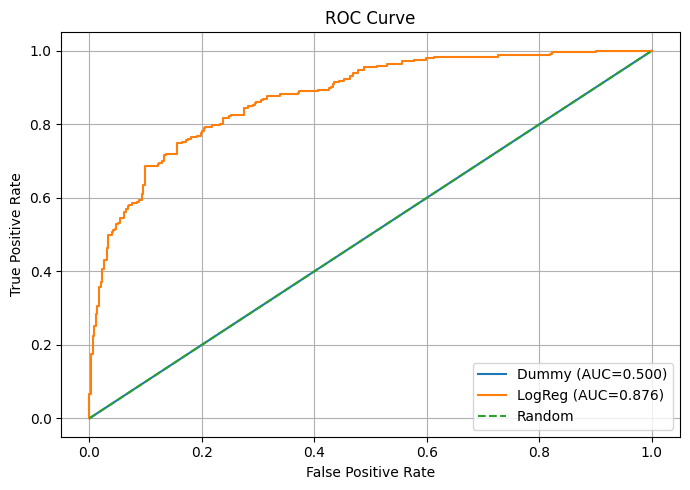

Saved to: D:\Study\github\Danishkin_Anton\homeworks\HW05\figures\roc_curve.png


In [13]:
import os
os.makedirs("figures", exist_ok=True)

fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(7, 5))
plt.plot(fpr_dummy, tpr_dummy, label=f"Dummy (AUC={auc_dummy:.3f})")
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={auc_lr:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("figures/roc_curve.png", dpi=150)
plt.show()

print("Saved to:", os.path.abspath("figures/roc_curve.png"))

Вывод: Датасет содержит 3000 наблюдений и 17 столбцов, при этом пропусков в данных нет. Целевой признак default умеренно несбалансирован доля класса 1 составляет 41.03%, а класса 0 58.97%. При разбиении на обучающую и тестовую выборки со stratify баланс классов сохранился практически одинаковым, поэтому сравнение моделей можно считать корректным. Бейзлайн DummyClassifier со стратегией most_frequent предсказывает всегда самый частый класс, поэтому даёт accuracy 0.59, но ROC-AUC ровно 0.50, то есть не умеет различать классы и фактически не ранжирует риск дефолта. Логистическая регрессия в пайплайне со StandardScaler показала существенно лучший результат accuracy 0.8017 и ROC-AUC 0.8756, что означает заметный прирост и по доле верных ответов, и по качеству ранжирования вероятностей. Подбор гиперпараметра регуляризации дал лучший вариант при C=100.0, а средний ROC-AUC на кросс-валидации составил 0.8607, что подтверждает стабильное качество модели на обучающих фолдах. В целом логистическая регрессия является разумной базовой моделью для этой задачи, так как значительно превосходит простой бейзлайн и предоставляет интерпретируемые вероятности, пригодные для принятия решений. ROC-кривая построена и сохранена в файл figures/roc_curve.png, что фиксирует визуальное подтверждение преимущества модели над случайным угадыванием.